In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa

%config IPCompleter.greedy = True
pd.options.display.max_columns = None

In [12]:
con = sa.create_engine('sqlite:///airbnb.db')

df = pd.read_sql('df_prepa', con = con)

df.head(5)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_dsc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,bathrooms_disc
0,0,0,21853,Bright and airy room,83531,Latina,Cármenes,40.40381,-3.74130,Private room,29.0,4,2,233,We have a quiet and sunny room with a good vie...,f,1,1.0,1.0,1.0,33,4.58,4.82,4.21,2267,Latina,29.0,36,01_Una,0-3,1,11-71,50,79345.0,3.521406,0-1
1,1,1,30320,Great Vacational Apartments,130907,Centro,Sol,40.41476,-3.70418,Entire home/apt,130.0,5,3,0,None,f,2,1.0,1.0,1.0,172,4.63,4.78,4.90,4827,Centro,130.0,100,01_Una,0-3,1,71-1080,50,168945.0,0.230175,0-1
2,2,2,30959,Beautiful loft in Madrid Center,132883,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,96.0,3,1,0,Beautiful Loft 60m2 size just in the historica...,f,2,1.0,1.0,1.0,8,4.38,4.63,4.88,4827,Centro,96.0,100,01_Una,0-3,1,0-10,50,168945.0,0.499379,0-1
3,3,3,40916,Holiday Apartment Madrid Center,130907,Centro,Universidad,40.42247,-3.70577,Entire home/apt,109.0,5,3,0,None,f,3,1.0,1.0,2.0,49,4.65,4.79,4.88,4827,Centro,109.0,100,01_Una,0-3,2,11-71,50,168945.0,0.671046,0-1
4,4,4,62423,MAGIC ARTISTIC HOUSE IN THE CENTER OF MADRID,303845,Centro,Justicia,40.41884,-3.69655,Private room,77.0,1,3,298,INCREDIBLE HOME OF AN ARTIST SURROUNDED BY PAI...,f,4,1.5,1.0,2.0,227,4.64,4.85,4.97,4827,Centro,107.8,18,01_Una,4,2,71-1080,50,168945.0,0.621024,1.5


In [13]:
df.precio_total.describe()

count    25092.000000
mean       133.540626
std        389.967525
min         20.000000
25%         70.000000
50%         98.000000
75%        133.000000
max      23124.000000
Name: precio_total, dtype: float64

In [14]:
df.precio_total.median()

98.0

In [15]:
df.groupby('distrito')['precio_total'].median().sort_values(ascending = False)

distrito
Salamanca                132.0
Chamberí                 117.0
Moncloa - Aravaca        117.0
Centro                   113.2
Chamartín                102.0
Retiro                   100.8
Tetuán                    94.0
Arganzuela                88.0
Hortaleza                 83.5
San Blas - Canillejas     75.0
Fuencarral - El Pardo     69.0
Barajas                   67.0
Carabanchel               67.0
Ciudad Lineal             66.0
Puente de Vallecas        65.0
Villaverde                64.0
Usera                     63.5
Latina                    63.0
Villa de Vallecas         58.5
Vicálvaro                 51.5
Moratalaz                 44.0
Name: precio_total, dtype: float64

In [11]:
df.loc[df.distrito =='San Blas - Canillejas'].sort_values('precio_total', ascending = False).head(10)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_dsc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,bathrooms_disc
5828,5828,5828,35155733,Cosy apartment near Metropolitano Stadium,78241549,San Blas - Canillejas,Hellín,40.431270,-3.612340,Private room,1050.0,1,1,0,"A cosy apartment with two bedrooms, two bathro...",f,5,1.5,2.0,2.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,1470.0,100,02_Dos,5-16,2,0-10,70,126959.0,7.873067,1.5
11130,11130,11130,700011597005161293,Habitación reformada,144457564,San Blas - Canillejas,Arcos,40.424480,-3.620770,Private room,1000.0,2,1,89,Surrender to the charms of this modern home fu...,f,3,1.0,1.0,2.0,1,5.00,5.00,5.00,2591,San Blas - Canillejas,1400.0,75,01_Una,0-3,2,0-10,50,90685.0,7.044653,0-1
5400,5400,5400,34569100,Final Champions close of Wanda Stadium.Two Rooms,231479865,San Blas - Canillejas,Rosas,40.430000,-3.606940,Private room,950.0,1,1,365,Two rooms very close of Wanda Stadium. Tres hu...,f,3,2.0,2.0,2.0,1,5.00,5.00,5.00,2591,San Blas - Canillejas,1330.0,0,02_Dos,0-3,2,0-10,70,126959.0,8.294853,2-15
5802,5802,5802,35137335,Bedrooms Champion League Final,124425621,San Blas - Canillejas,Arcos,40.426580,-3.611960,Private room,500.0,1,1,365,I rent rooms for Champions League Final<br />3...,f,3,2.0,2.0,3.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,1050.0,0,02_Dos,0-3,2,0-10,70,126959.0,7.814783,2-15
12091,12091,12091,774773851284478554,Casa acogedora e piso reformado,195950344,San Blas - Canillejas,Amposta,40.428033,-3.619205,Private room,1000.0,365,1,1,Break up with your day-to-day life and relax i...,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,1000.0,99,01_Una,0-3,1,0-10,50,90685.0,7.234117,0-1
8053,8053,8053,46653997,LUXURY PENTHOUSE. TERRACE + SWIMMING POOL,376377623,San Blas - Canillejas,Hellín,40.433160,-3.619620,Entire home/apt,1000.0,2,4,116,Penthouse decorated in detail with high qualit...,t,4,1.0,1.0,2.0,123,4.87,4.88,4.69,2591,San Blas - Canillejas,1000.0,68,01_Una,4,2,71-1080,50,90685.0,7.320438,0-1
5601,5601,5601,34796669,Bedrooms close to Wanda Metropolitano,49642755,San Blas - Canillejas,Rosas,40.425620,-3.604900,Private room,700.0,1,2,0,None,f,3,1.5,2.0,2.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,980.0,100,02_Dos,0-3,2,0-10,70,126959.0,8.393914,1.5
5788,5788,5788,35011833,Only 4 champions!!,47460057,San Blas - Canillejas,Salvador,40.438820,-3.635110,Entire home/apt,913.0,3,1,179,None,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,913.0,50,01_Una,0-3,1,0-10,50,90685.0,6.277691,0-1
16370,16370,16370,1029047360999100969,Beatifull apartement in the center of the city,528957573,San Blas - Canillejas,Rejas,40.446989,-3.596043,Entire home/apt,901.0,1,1,270,This is a very beatiful house. You will enjoy it.,f,1,1.0,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,901.0,26,01_Una,0-3,1,0-10,50,90685.0,9.687539,0-1
5846,5846,5846,35175181,Habitacion final champions wanda metropolitano,215817131,San Blas - Canillejas,Rosas,40.434720,-3.608320,Private room,800.0,1,1,89,None,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,800.0,75,01_Una,0-3,1,0-10,50,90685.0,8.290461,0-1


In [14]:
temp = df.groupby('distrito')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
distrito,,
Arganzuela,88.0,142975.0
Barajas,67.0,119315.0
Carabanchel,67.0,74305.0
Centro,113.2,168945.0
Chamartín,102.0,178430.0
Chamberí,117.0,188335.0
Ciudad Lineal,66.0,102900.0
Fuencarral - El Pardo,69.0,124880.0
Hortaleza,83.5,135485.0


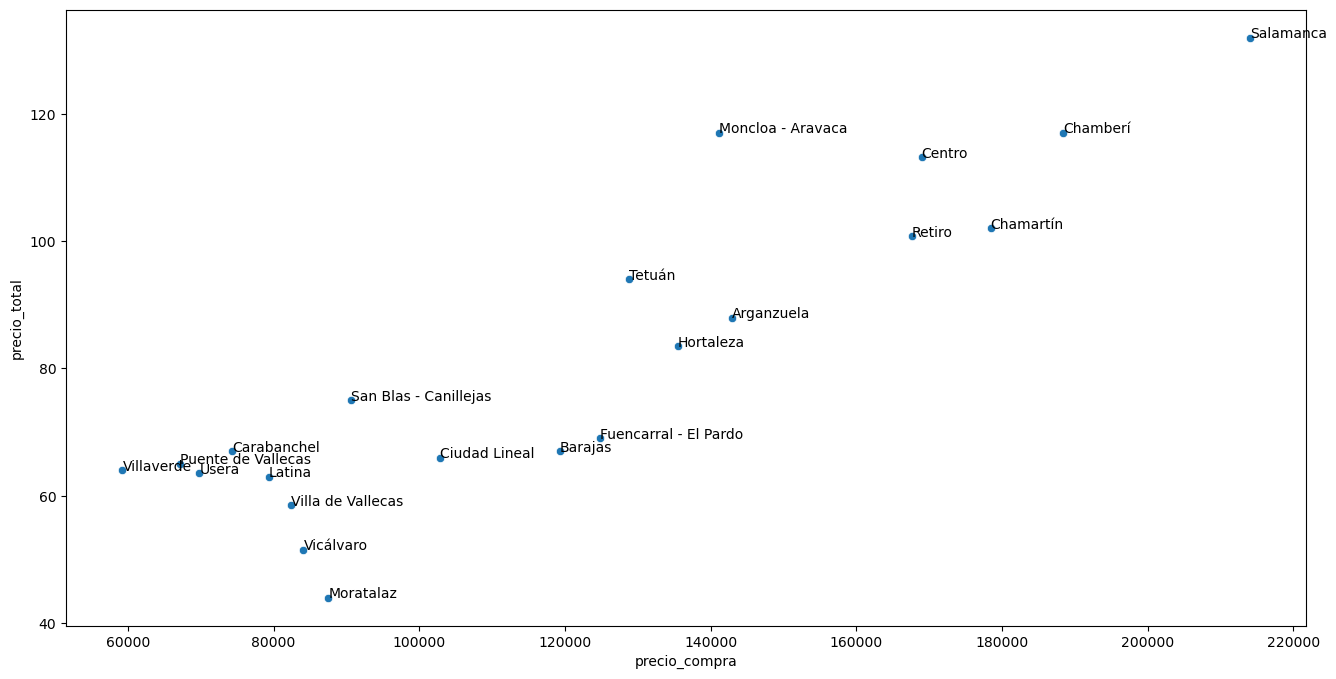

In [22]:
plt.figure(figsize =(16,8))
sns.scatterplot(data = temp, x= 'precio_compra', y = 'precio_total')
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada], fontsize = 10)
plt.show()

In [23]:
temp = df.groupby('neighbourhood')[['precio_total','precio_compra']].median()
temp

,precio_total,precio_compra
neighbourhood,,
Abrantes,40.0,74305.0
Acacias,86.0,142975.0
Adelfas,97.0,167580.0
Aeropuerto,54.0,119315.0
Aguilas,40.0,79345.0
...,...,...
Valverde,63.5,124880.0
Ventas,65.0,102900.0
Vinateros,32.0,87500.0


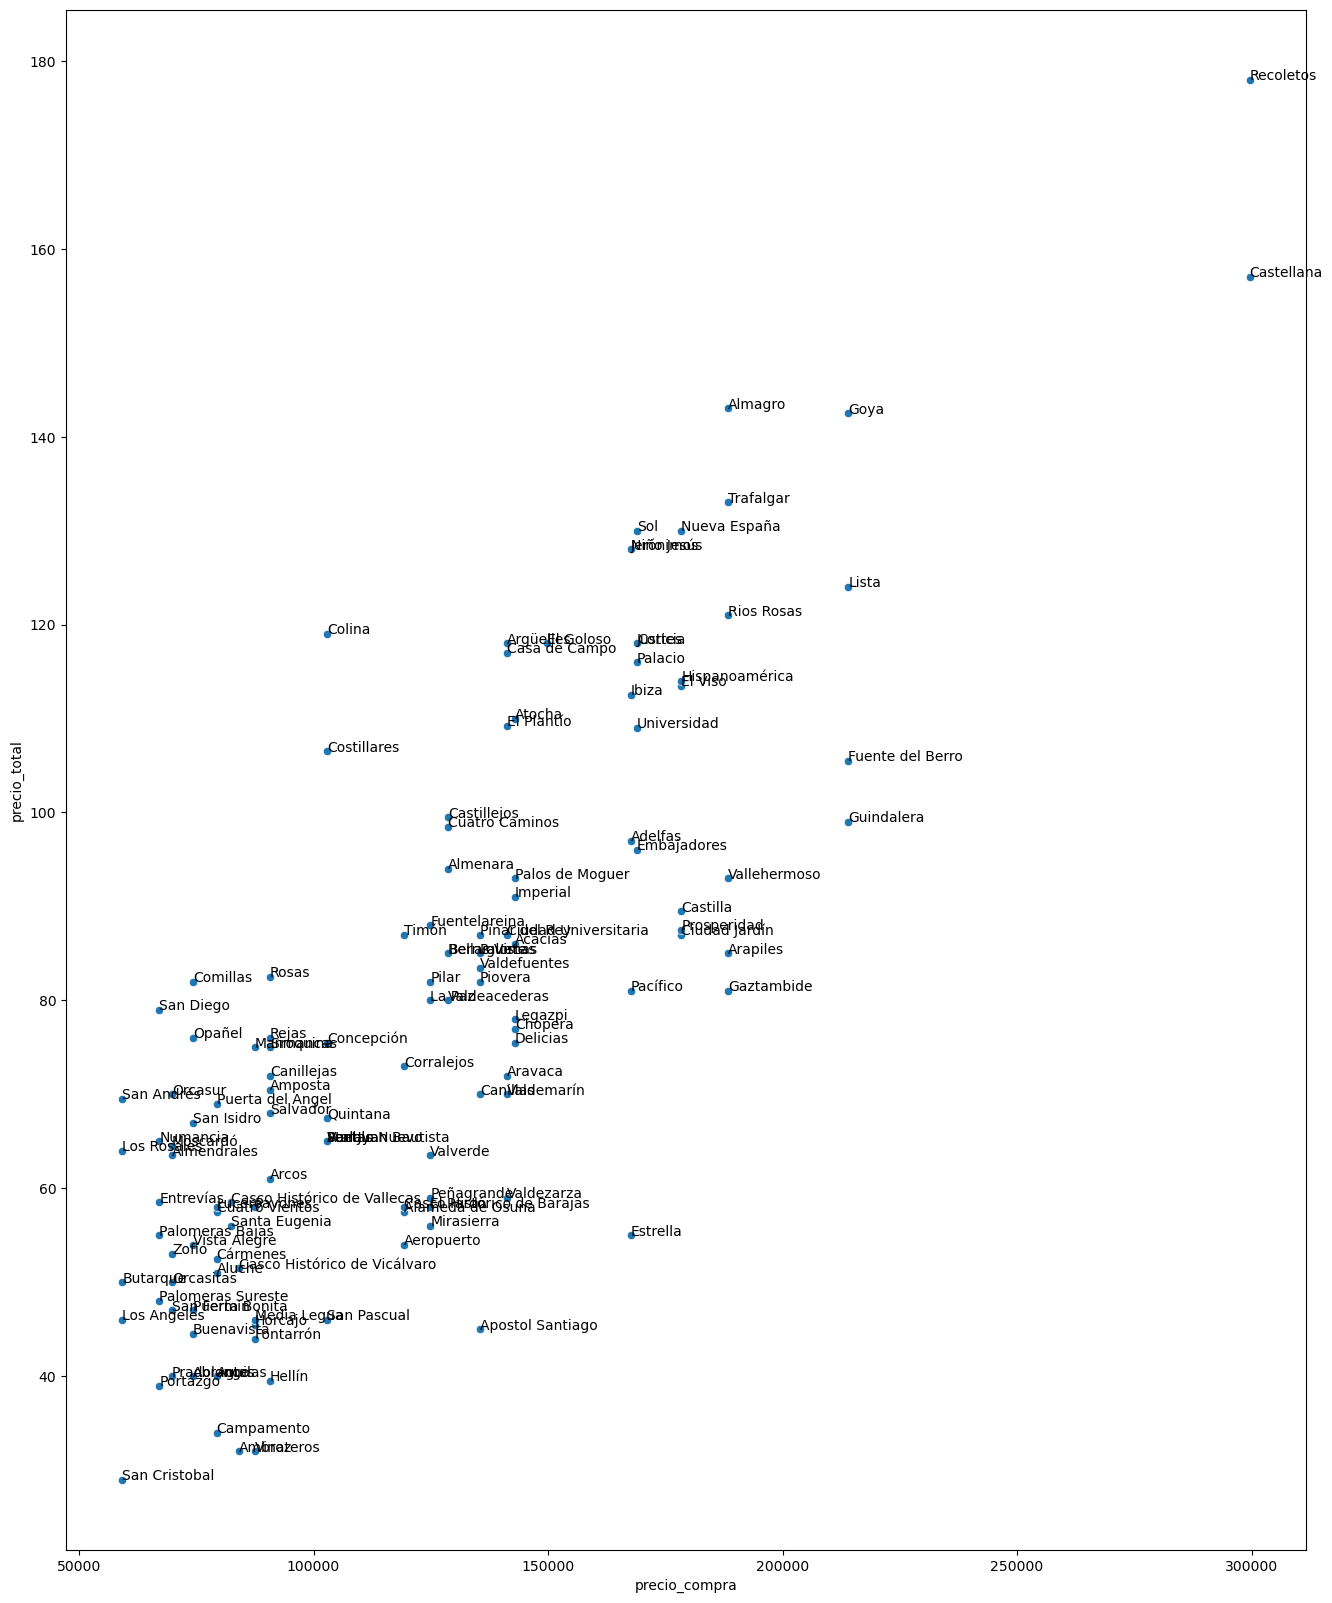

In [24]:
plt.figure(figsize =(16,20))
sns.scatterplot(data = temp, x= 'precio_compra', y = 'precio_total')
for cada in range(0,temp.shape[0]):
    plt.text(temp.precio_compra.iloc[cada], temp.precio_total.iloc[cada], temp.index[cada], fontsize = 10)
plt.show()

In [25]:
df.filter(like = 'disc')

,accommodates_disc,beds_disc,number_of_reviews_disc,bathrooms_disc
0,0-3,1,11-71,0-1
1,0-3,1,71-1080,0-1
2,0-3,1,0-10,0-1
3,0-3,2,11-71,0-1
4,4,2,71-1080,1.5
...,...,...,...,...
25087,0-3,1,0-10,0-1
25088,0-3,1,0-10,0-1
25089,0-3,2,0-10,0-1
25090,5-16,2,0-10,0-1


In [26]:
metricas = ['precio_total','precio_compra']
dimensiones = ['accommodates_disc','beds_disc','bedrooms_dsc','bathrooms_disc']

minicubo_precio = df[dimensiones + metricas]

minicubo_precio

,accommodates_disc,beds_disc,bedrooms_dsc,bathrooms_disc,precio_total,precio_compra
0,0-3,1,01_Una,0-1,29.0,79345.0
1,0-3,1,01_Una,0-1,130.0,168945.0
2,0-3,1,01_Una,0-1,96.0,168945.0
3,0-3,2,01_Una,0-1,109.0,168945.0
4,4,2,01_Una,1.5,107.8,168945.0
...,...,...,...,...,...,...
25087,0-3,1,01_Una,0-1,67.0,128730.0
25088,0-3,1,01_Una,0-1,63.0,128730.0
25089,0-3,2,01_Una,0-1,103.0,135485.0
25090,5-16,2,02_Dos,0-1,100.0,104027.0


In [27]:
minicubo_precio = minicubo_precio.melt(id_vars = ['precio_total','precio_compra'])
minicubo_precio

,precio_total,precio_compra,variable,value
0,29.0,79345.0,accommodates_disc,0-3
1,130.0,168945.0,accommodates_disc,0-3
2,96.0,168945.0,accommodates_disc,0-3
3,109.0,168945.0,accommodates_disc,0-3
4,107.8,168945.0,accommodates_disc,4
...,...,...,...,...
100363,67.0,128730.0,bathrooms_disc,0-1
100364,63.0,128730.0,bathrooms_disc,0-1
100365,103.0,135485.0,bathrooms_disc,0-1
100366,100.0,104027.0,bathrooms_disc,0-1


In [28]:
minicubo_precio = minicubo_precio.groupby(['variable','value'])[['precio_total','precio_compra']].agg('median')
minicubo_precio

precio_total  precio_compra
variable          value                                       
accommodates_disc 0-3                      82.0       168945.0
                  4                       114.0       168945.0
                  5-16                    156.5       236523.0
bathrooms_disc    0-1                      94.0       168945.0
                  1.5                      84.0       168945.0
                  2-15                    147.0       236523.0
bedrooms_dsc      00_cero                  87.0       168945.0
                  01_Una                   87.0       168945.0
                  02_Dos                  126.0       236523.0
                  03_Tres                 161.0       304101.0
                  04_Cuatro_o_mas         206.5       405468.0
beds_disc         1                        80.0       168945.0
                  2                       113.4       168945.0
                  3-40                    179.0       263669.0

In [29]:
minicubo_precio.loc['bedrooms_dsc']

,precio_total,precio_compra
value,,
00_cero,87.0,168945.0
01_Una,87.0,168945.0
02_Dos,126.0,236523.0
03_Tres,161.0,304101.0
04_Cuatro_o_mas,206.5,405468.0


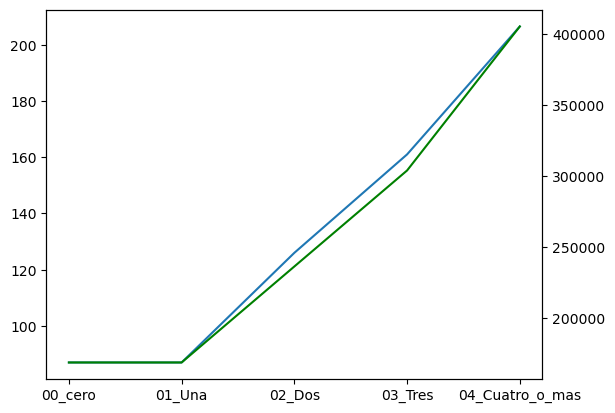

In [30]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bedrooms_dsc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bedrooms_dsc'].precio_compra, color = 'green')
plt.show()

In [31]:
minicubo_precio.loc['beds_disc']

,precio_total,precio_compra
value,,
1,80.0,168945.0
2,113.4,168945.0
3-40,179.0,263669.0


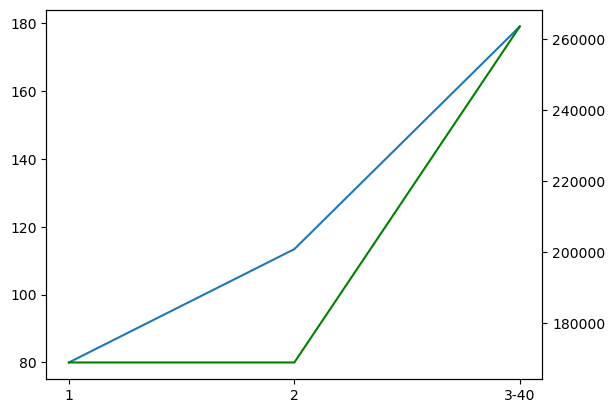

In [32]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['beds_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['beds_disc'].precio_compra, color = 'green')
plt.show()

In [33]:
minicubo_precio.loc['accommodates_disc']

,precio_total,precio_compra
value,,
0-3,82.0,168945.0
4,114.0,168945.0
5-16,156.5,236523.0


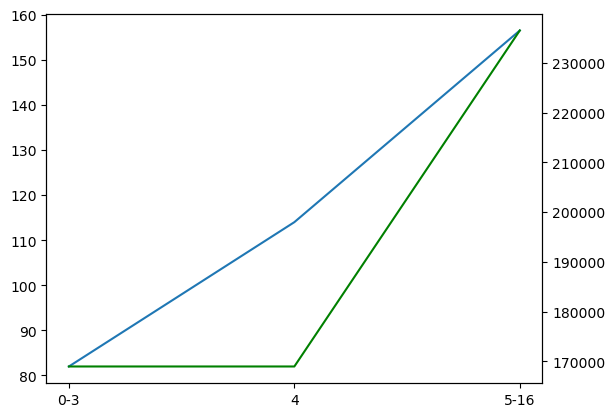

In [34]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['accommodates_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['accommodates_disc'].precio_compra, color = 'green')
plt.show()

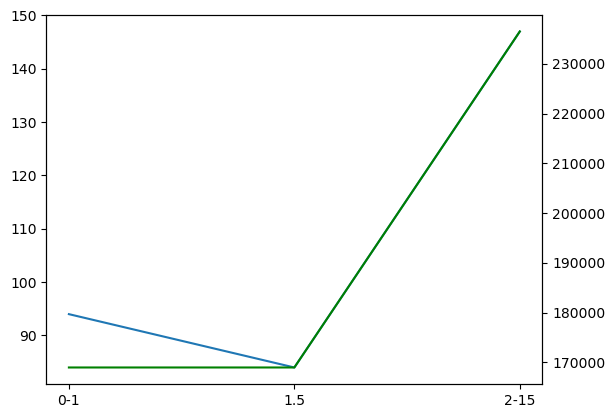

In [35]:
f, ax = plt.subplots()
ax.plot(minicubo_precio.loc['bathrooms_disc'].precio_total)
ax2 = ax.twinx()
ax2.plot(minicubo_precio.loc['bathrooms_disc'].precio_compra, color = 'green')
plt.show()

In [36]:
df.groupby('distrito').pdi_sol.median().sort_values()

distrito
Centro                    0.733661
Arganzuela                1.791178
Moncloa - Aravaca         1.997755
Chamberí                  2.070387
Retiro                    2.452066
Salamanca                 2.809172
Latina                    3.332668
Carabanchel               3.569506
Usera                     3.734871
Puente de Vallecas        4.220240
Chamartín                 4.440513
Tetuán                    4.663274
Moratalaz                 5.118269
Ciudad Lineal             5.130979
Fuencarral - El Pardo     7.499639
Villaverde                7.527881
Hortaleza                 8.121795
San Blas - Canillejas     8.132380
Vicálvaro                 8.451841
Villa de Vallecas         8.766022
Barajas                  11.594355
Name: pdi_sol, dtype: float64

In [38]:
seleccion = df.groupby('distrito').pdi_sol.median().sort_values()[0:7].index.to_list()
seleccion

['Centro',
 'Arganzuela',
 'Moncloa - Aravaca',
 'Chamberí',
 'Retiro',
 'Salamanca',
 'Latina']

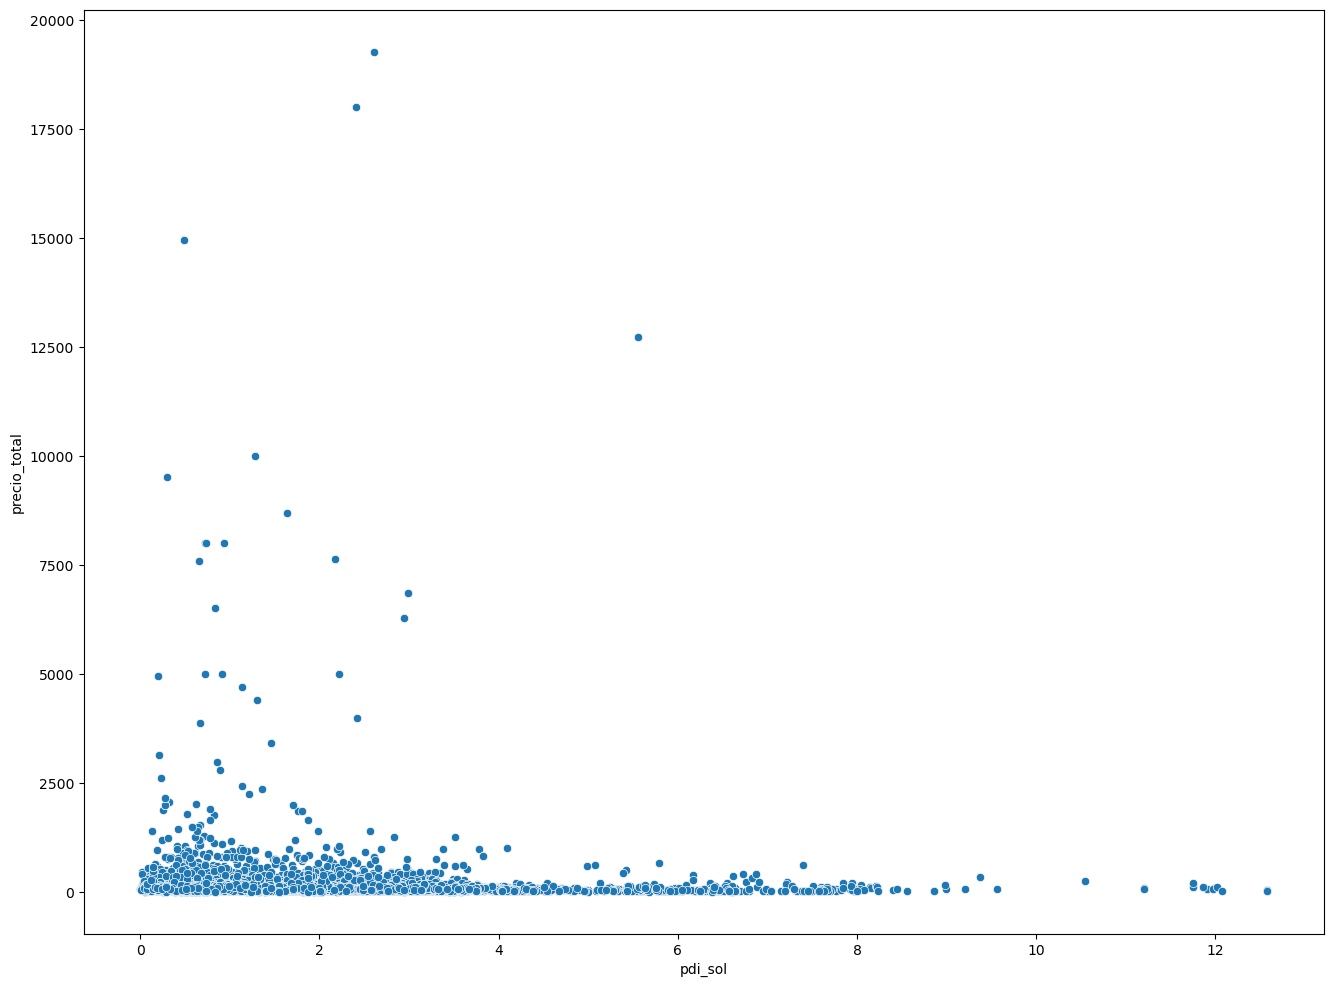

In [39]:
plt.figure(figsize = (16,12))
sns.scatterplot(data = df.loc[df.distrito.isin(seleccion)], x = 'pdi_sol', y= 'precio_total')
plt.show()

In [42]:
import folium

In [45]:
datos = df[df.distrito  == 'San Blas - Canillejas'].copy()
datos.head(5)

,level_0,index,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,precio_m2,distrito,precio_total,ocupacion,bedrooms_dsc,accommodates_disc,beds_disc,number_of_reviews_disc,m2,precio_compra,pdi_sol,bathrooms_disc
65,65,65,479718,"Estadio Metropolitano, 20 minutes to Sol by tube",2376402,San Blas - Canillejas,Rosas,40.43202,-3.60353,Private room,76.0,1,2,89,None,f,2,2.0,1.0,1.0,26,4.63,4.96,4.56,2591,San Blas - Canillejas,76.0,75,01_Una,0-3,1,11-71,50,90685.0,8.620512,2-15
142,142,142,758670,Cozy Bedroom AirPort / IFEMA/ Civitas Stadium,2536524,San Blas - Canillejas,Arcos,40.42670,-3.61631,Private room,61.0,28,4,218,"🛌 Cozy room of 15 square meters, just 10 minut...",None,2,1.0,1.0,1.0,29,4.76,4.90,4.41,2591,San Blas - Canillejas,61.0,40,01_Una,0-3,1,11-71,50,90685.0,7.452229,0-1
152,152,152,797030,Cosy flat with terrace near subway,4198169,San Blas - Canillejas,Simancas,40.43602,-3.63506,Entire home/apt,66.0,4,1,109,None,f,3,2.0,2.0,2.0,336,4.80,4.75,4.57,2591,San Blas - Canillejas,66.0,70,02_Dos,0-3,2,71-1080,70,126959.0,6.166538,2-15
154,154,154,814647,"Alojamiento en familia, Madrid",4159117,San Blas - Canillejas,Salvador,40.44030,-3.63464,Private room,68.0,90,1,0,None,f,2,1.0,1.0,1.0,0,NaN,NaN,NaN,2591,San Blas - Canillejas,68.0,100,01_Una,0-3,1,0-10,50,90685.0,6.380133,0-1
175,175,175,874029,"B&B in a bright room, Madrid!+wiffi",4603165,San Blas - Canillejas,Salvador,40.44490,-3.63508,Private room,75.0,2,1,0,None,f,2,1.0,1.0,2.0,94,4.98,4.98,4.78,2591,San Blas - Canillejas,105.0,100,01_Una,0-3,2,71-1080,50,90685.0,6.573926,0-1


In [46]:
mapa = folium.Map(location = [40.4167278,-3.7033387], zoom_start = 12)
for piso in range(0,len(datos)):
    folium.Marker(
        location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
        popup = datos.iloc[piso]['precio_total']).add_to(mapa)
mapa

In [47]:
datos['precio_total_disc'] = pd.qcut(datos['precio_total'], q = [0,0.25,0.50,0.75,1], 
       labels = ['green','orange','red','darkred'])

In [48]:
mapa = folium.Map(location = [40.4167278,-3.7033387], zoom_start = 12)
for piso in range(0,len(datos)):
    folium.CircleMarker(
        location = [datos.iloc[piso]['latitude'], datos.iloc[piso]['longitude']],
        popup = datos.iloc[piso]['precio_total'],
        fill = True,
        color = datos.iloc[piso]['precio_total_disc'],
        fill_opacity = 1,
        radius = 5).add_to(mapa)
mapa